In [165]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from joblib import dump, load
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from joblib import dump, load
import matplotlib.pyplot as plt
pd.options.display.max_rows = 200
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


In [84]:
alg_type = 'cancer_classification'
data_type = ['train','test']
for dt in data_type:
    class_type = os.listdir('../data/'+alg_type+'/unsorted_data/' + dt)
    for ct in class_type:
        fileways = '../data/'+alg_type+'/unsorted_data/' + dt +'/' + ct
        renamed_fileways = '../data/'+alg_type+'/renamed_data/' + dt +'/' + ct
        class_filenames = os.listdir(fileways)
        k = 0
        for cl in class_filenames:
            os.rename(fileways + '/' + cl, renamed_fileways + '/' + dt + '_' + ct + '_' + str(k) + '.'+ cl.split('.')[-1])
            k += 1

In [87]:
alg_type = 'cancer_classification'
data_type = ['train','test']
for dt in data_type:
    class_type = os.listdir('../data/'+alg_type+'/renamed_data/' + dt)
    for ct in class_type:
        renamed_fileways = '../data/'+alg_type+'/renamed_data/' + dt +'/' + ct
        resized_fileways = '../data/'+alg_type+'/resized_data/' + dt +'/' + ct
        class_filenames = os.listdir(renamed_fileways)
        k = 0
        for cl in class_filenames:
            img = cv2.imread(renamed_fileways+'/'+ cl, cv2.IMREAD_UNCHANGED)
            width = 256
            height = 256
            dim = (width, height)
            # resize image
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            resized = resized/255
            #print('Resized Dimensions : ',resized.shape)
            cv2.imwrite(resized_fileways+'/'+ cl, resized) 

In [154]:
def get_data(alg_type, data_type):
    X = []
    Y = []
    pathname = os.listdir('../data/'+alg_type+'/resized_data/'+data_type)
    for filepath in pathname:    
        fileways = '../data/'+alg_type+'/resized_data/'+data_type +'/'+ filepath
        image_filenames = os.listdir(fileways)
        for i in image_filenames:
            img = cv2.imread(fileways + '/' + i, cv2.IMREAD_GRAYSCALE)
            X.append(img)
            Y.append(filepath)
    X = np.array(X)
    Y = np.array(Y)
    X = X.reshape((len(Y),-1))
    return X, Y

In [155]:
X_train, Y_train = get_data('cancer_classification', 'train')
X_test, Y_test = get_data('cancer_classification', 'test')

In [156]:
try:
    del clf
except:
    None
clf = svm.SVC(gamma=0.00001)
clf.fit(X_train, Y_train)
dump(clf, '../models/cc.joblib') 

['../models/cc.joblib']

In [173]:
Y_pred = clf.predict(X_train)
print(np.mean(Y_pred == Y_train))
print(Y_train)
print(Y_pred)

0.8958333333333334
['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '6' '6' '6' '6'
 '6' '6' '6' '6' '6' '6' '6' '6' '6' '6' '6' '6']
['2' '2' '2' '2' '6' '6' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '2' '6' '6' '6'
 '6' '6' '6' '6' '6' '6' '2' '4' '6' '6' '6' '6']


In [174]:
Y_pred = clf.predict(X_test)
print(np.mean(Y_pred == Y_test))
print(Y_test)
print(Y_pred)

1.0
['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '4' '4' '4' '4' '4' '6']
['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '4' '4' '4' '4' '4' '6']


In [171]:
y_pred = label_binarize(Y_pred, classes=['2','4','6'])
y_true = label_binarize(Y_test, classes=['2','4','6'])

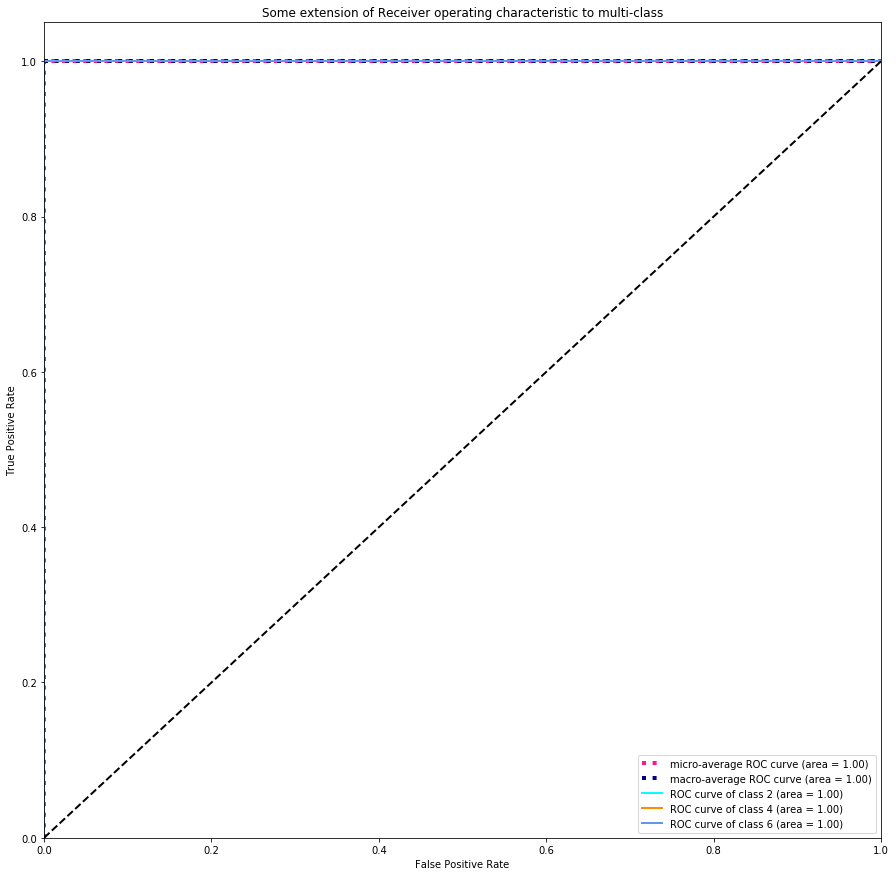

In [176]:
classes=['2','4','6']
n_classes = 3
lw = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (15,15))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.savefig('../train_plots/cancer_classifier_auc_roc.jpg')
plt.show()